Student Details

Name: **Abhijit Sinha**

ID: **18195067**

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 

# Using a global random seed for reproducible results when doing multiple runs
np.random.seed(5)

### Data Preparation: Read the CSV files and store in X and y

In [2]:
# Function to read the CSV and plot the input data
def read_csv_file(filename):
    
    # Open the dataset_1 csv  file and import data
    with open(filename, 'r') as f1:
        first_line = f1.readline()
        data = np.loadtxt(fname=f1, delimiter=',')
   
    # Input samples stored in X
    X = data[:,1:3]
    # Target class stored in y
    y = data[:,-1]
    print("Data shape X:{} and y:{}".format(X.shape, y.shape))

    # Plot the input data
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
    plt.title(filename)
    plt.show()

    return X,y

### Read dataset 1

Data shape X:(10001, 2) and y:(10001,)


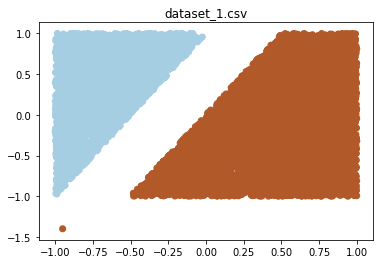

In [3]:
X1, y1 = read_csv_file(filename='dataset_1.csv')

### Read dataset 2

Data shape X:(10000, 2) and y:(10000,)


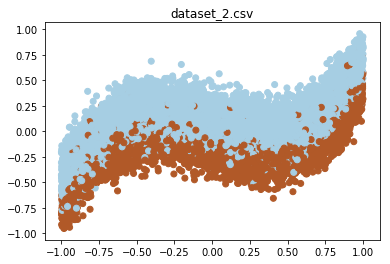

In [4]:
X2, y2 = read_csv_file(filename='dataset_2.csv')

### Read dataset 3

Data shape X:(10000, 2) and y:(10000,)


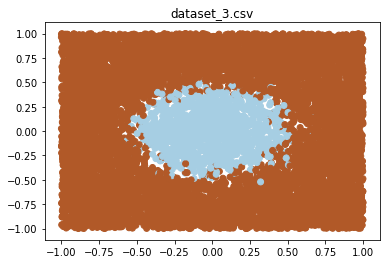

In [5]:
X3, y3 = read_csv_file(filename='dataset_3.csv')

### Shuffle and Split dataset 1, 2 and 3 into training(80%) and test set(20%)

In [6]:
def split_data(X, y, test_size):
    # Split the data into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, stratify=y)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test

In [7]:
X1_train, X1_test, y1_train, y1_test = split_data(X1, y1, test_size=0.2)

(8000, 2) (2001, 2) (8000,) (2001,)


In [8]:
X2_train, X2_test, y2_train, y2_test = split_data(X2, y2, test_size=0.2)

(8000, 2) (2000, 2) (8000,) (2000,)


In [9]:
X3_train, X3_test, y3_train, y3_test = split_data(X3, y3, test_size=0.2)

(8000, 2) (2000, 2) (8000,) (2000,)


# Task 4
**[Task]:** Perform classification on dataset_1 using an SVM with linear kernel and experiment with the C-parameter to find the widest margin solution with a hard margin and a soft margin. 

**[Rubric]:** 
- Two plots for suitable values of the C-parameter showing the difference between a soft- and hard-margin SVM. 
- Numerical data with explanation to support the conclusions drawn from the graphs.


**[Learning]:** This task provides an insight in how SVM’s try to find a hyperplane (which in two dimensions is a line) which divides two classes with the maximum margin on either side of the hyperplane. You can use the C-parameter as a form of regularization; with this parameter you can allow the SVM to miss-classify certain points to allow a wider margin and thus, hopefully, a better performance out-of-sample.

In [10]:
# Function to plot the decision boundary

def plot_decision_boundary(X_train, y_train, classifier, label=''):
    # Sample code to plot SVM margin, 'gutters' and support vectors
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = classifier.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], 
               s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.title("SVM Classifier: " + label)
    

In [11]:
def print_grid_search_metrics(clf, X_train):
    # Function to print the Eout and Grid search results
    
    # Scores for different hyper-parameters
    print ("Scores for different hyper-parameters")
    gridCV_score = clf.cv_results_['mean_test_score']
    gridCV_stds = clf.cv_results_['std_test_score']
    for score, std, best_params in zip(gridCV_score, gridCV_stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (score, std * 2, best_params))

    # Calculate the Expected Error based on the number of Support Vectors
    nb_training_samples = len(X_train)
    nb_support_vectors = len(clf.best_estimator_.support_vectors_)
    e_out = nb_support_vectors/(nb_training_samples - 1)

    print("**"*40)
    print("Number of Support Vectors/Training samples: {}/{}".format(nb_support_vectors, nb_training_samples))
    print("Number of Support Vectors per class:", clf.best_estimator_.n_support_)
    print("Expected E_out :", e_out)
    print("Best SVM parameters :", clf.best_params_)
    print("**"*40)

### Impact of C on the dataset 1 SVM margin

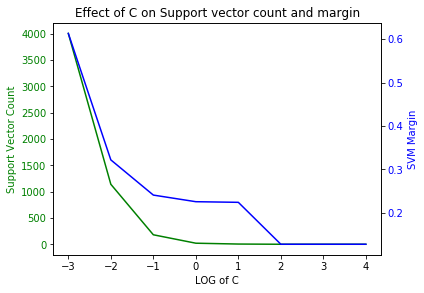

In [12]:
# Select a range of C values
c_range = [0.001, 0.01, 0.1, 1.0, 10, 100, 1000, 10000]

num_sv = []
margins=[]

for c in c_range:
    svm_clf = svm.SVC(kernel='linear', C=c)
    svm_clf.fit(X1_train, y1_train)
    num_sv.append(svm_clf.support_.shape[0])
    margins.append(1 / np.sqrt(np.sum(svm_clf.coef_ ** 2)))

#(The below plot is inspired by Brian Parle's work)
# Plot the values of Support vectors and margins with Log C values
fig, ax1 = plt.subplots()

ax1.set_xlabel('LOG of C')
ax1.set_ylabel('Support Vector Count', color='g')
ax1.plot(np.log10(c_range), num_sv, color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()
ax2.set_ylabel('SVM Margin', color='b')
ax2.plot(np.log10(c_range), margins, color='b')
ax2.tick_params(axis='y', labelcolor='b')

fig.tight_layout()
plt.title('Effect of C on Support vector count and margin')
plt.show()

The above plots shows that for smaller C values, there is very high number of support vectors and the margin is very large. As the value of C increases the margin becomes smaller and support vectors are also reduced. Also there the Estimator Error reduces as per the relation [Eout <= Num_of_SV's / N-1]

In the plot we can also see that the margin is converged at C=100 and for any further larger C value there is no change in the margin.

A smaller C will lead to a softer margin, with a greater tolerance to allow some mis-classifications. It can prevent over-fitting but too small a C value can lead to underfitting.

### Margin Visualization for various C values in Dataset 1

C:0.01	 Test score:1.0	 n_SV's:1142	 E_out:0.14277
C:0.1	 Test score:1.0	 n_SV's:183	 E_out:0.02288
C:1	 Test score:1.0	 n_SV's:23	 E_out:0.00288
C:10	 Test score:1.0	 n_SV's:7	 E_out:0.00088
C:100	 Test score:1.0	 n_SV's:3	 E_out:0.00038


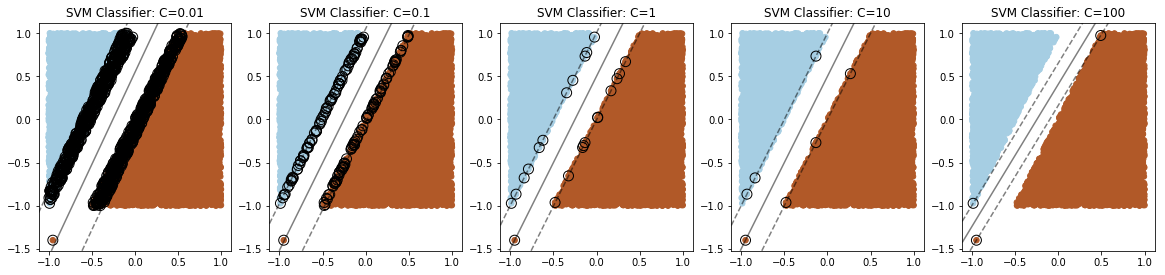

In [13]:
# Select a suitable range of C values
C_values = [0.01, 0.1, 1, 10, 100]

# Add a figure for plotting the decision boundarys in subplots
f = plt.figure(figsize=(20,20))

# Loop to get the effect of C on dataset 1
for idx, c_val in enumerate(C_values):   
    # SVM classifer with various C
    clf = svm.SVC(kernel='linear', C=c_val)
    clf.fit(X1_train, y1_train)
    
    # Number of Support vectors
    num_SVs = clf.support_.shape[0]
    
    # Calculate the Expected Error based on the number of Support Vectors
    e_out = np.sum(clf.n_support_) / (X1_train.shape[0] - 1)
    
    ax = f.add_subplot(1,len(C_values),idx+1)
    plot_decision_boundary(X1_train, y1_train, clf, label='C={}'.format(c_val))

    y_pred = clf.predict(X1_test)
    score = clf.score(X1_test, y1_test)
    print("C:{}\t Test score:{}\t n_SV's:{}\t E_out:{:.5f}".format(c_val, score, num_SVs, e_out))
    

For a small C=0.01, there is a large margin in SVM decision boundary, but one point is misclassified.

For a large C=100, there is a small margin and no mis-classifications. However, this can lead to overfitting if there is noise present in data.

### Soft and Hard Margin

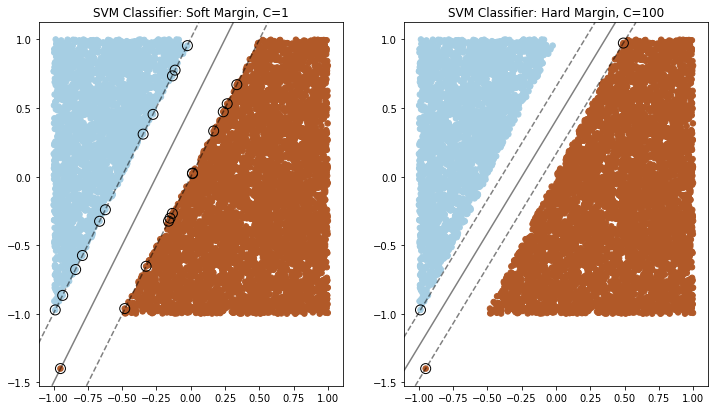

In [14]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
soft_margin_svm = svm.SVC(C=1, kernel='linear')
soft_margin_svm.fit(X1_train, y1_train)
plot_decision_boundary(X1_train, y1_train, soft_margin_svm, label='Soft Margin, C=1')

plt.subplot(1,2,2)
hard_margin_svm = svm.SVC(C=100, kernel='linear')
hard_margin_svm.fit(X1_train, y1_train)
plot_decision_boundary(X1_train, y1_train, hard_margin_svm, label='Hard Margin, C=100')

## Conclusion on SVM margins and C values:
The C parameter tells the SVM optimization how much we want to avoid misclassifying each training example acting as a regularizer parameter. By choosing C appropriately we can get a large margin hyperplane with a small amount of margin violation.

##### Soft Margin for Small C
For C=0.01, the number of support vectors (1142) are more and it mis-classifies the outlier data sample, but gives us a bigger margin.

Small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane mis-classifies more points. A very small C value can lead to underfitting. For small values of C we can see one data point is mis-classified.

##### Hard Margin for Large C
For C=100, the number of support vectors(3) are low and the plot has classified the outlier data sample with a cost of smaller margin.

Large value of C will cause the optimizer to look for a smaller-margin separating hyperplane if that hyperplane does a better job of getting all the training points classified correctly. A large C value can thus lead to the over-fitting problem as it will try to fit the noise in the data as well.

References: https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel

# Task 5
**[Task]:** Explore the provided data sets (dataset_1, dataset_2 and dataset_3) using Support Vector Machines and choose suitable kernels and hyper-parameters.

**[Rubric]:** 
- Suitable kernels and hyper parameters  proposed for all datasets. 
- Proper use of train and test data and plots of the SVM hyperplane. 
- Evidence of a structured approach to the selection of hyper-parameters.

**[Learning]:** This task provides an insight in how a kernel can allow the SVM (a linear classifier) to be used on non-linearly separable data sets by casting the data in some higher dimensional space as determined by the kernel you choose. In addition to choosing a suitable kernel, you will find that tuning the hyper-parameters of the SVM is important. Take some time to explore various kernels and values of the hyper-parameters to get a feel for how they affect performance and then use a structured approach to arrive at your final conclusions. Take into consideration the out-of-sample error (simulated and based on theory (see lecture 14 from Learning from Data)). 

Reference Articles:
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
- https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
- https://data-flair.training/blogs/svm-kernel-functions/

In [15]:
# Function to optimize SVM classfier for multiple datasets

def optimize_SVM(X_train, y_train, X_test, y_test, title=''):
    
    # Set the hyperparameters and select a range of C values and kernels for cross-valdiation
    
    # Set the parameters by cross-validation
    hyper_parameters = [
        {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
        {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [2, 3]},
        {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': [1e-3, 1e-2, 0.1, 1]}, 
    ]
    # Using a SVM base classifier
    SVM_clf = svm.SVC()

    # Using 10 fold cross-validation in grid search
    clf = GridSearchCV(SVM_clf, hyper_parameters, cv=10, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train, y_train)
    print_grid_search_metrics(clf, X_train)
    
    # Plot the SVM descision boundary
    plt.figure(figsize=(10,8))
    plot_decision_boundary(X_train, y_train, clf.best_estimator_, label=title)
    
    # Make predictions on test data
    y_pred = clf.best_estimator_.predict(X_test)
    
    # Test accuracy score on classiffiaction
    test_score = clf.best_estimator_.score(X_test, y_test)

    print("Best CV score :", clf.best_score_)
    print("Test data score", test_score)
    print("**"*40)
       
    return clf

### Dataset 1 hyper-parameter exploration

Scores for different hyper-parameters
1.000 (+/-0.001) for {'C': 0.1, 'kernel': 'linear'}
1.000 (+/-0.001) for {'C': 1, 'kernel': 'linear'}
1.000 (+/-0.000) for {'C': 10, 'kernel': 'linear'}
1.000 (+/-0.000) for {'C': 100, 'kernel': 'linear'}
0.668 (+/-0.001) for {'C': 0.1, 'kernel': 'poly', 'degree': 2}
0.955 (+/-0.016) for {'C': 0.1, 'kernel': 'poly', 'degree': 3}
0.668 (+/-0.001) for {'C': 1, 'kernel': 'poly', 'degree': 2}
0.994 (+/-0.006) for {'C': 1, 'kernel': 'poly', 'degree': 3}
0.668 (+/-0.001) for {'C': 10, 'kernel': 'poly', 'degree': 2}
1.000 (+/-0.001) for {'C': 10, 'kernel': 'poly', 'degree': 3}
0.668 (+/-0.001) for {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.001}
1.000 (+/-0.001) for {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.01}
1.000 (+/-0.001) for {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.1}
1.000 (+/-0.001) for {'C': 0.1, 'kernel': 'rbf', 'gamma': 1}
1.000 (+/-0.001) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.001}
1.000 (+/-0.001) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.01}
1.000 (

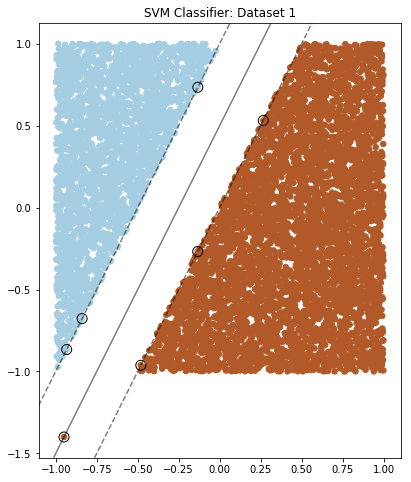

In [16]:
data1_clf = optimize_SVM(X1_train, y1_train, X1_test, y1_test, title='Dataset 1')

#### Effect of Poly and RBF Kernel in Dataset-1

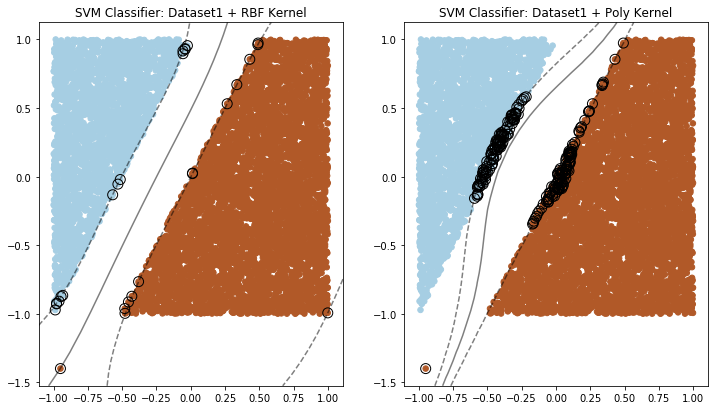

In [17]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
# Using the following parameters: {'C': 1, 'kernel': 'rbf', 'gamma': 0.001}
svm_rbf_data1 = svm.SVC(C=1, kernel='rbf', gamma=1)
svm_rbf_data1.fit(X1_train, y1_train)
plot_decision_boundary(X1_train, y1_train, svm_rbf_data1, label='Dataset1 + RBF Kernel')

plt.subplot(1,2,2)
# Using the following parameters: {'C': 10, 'degree': 3, 'kernel': 'poly'}
svm_poly_data1 = svm.SVC(C=10, kernel='poly', degree=3)
svm_poly_data1.fit(X1_train, y1_train)
plot_decision_boundary(X1_train, y1_train, svm_poly_data1, label='Dataset1 + Poly Kernel')

### Dataset 1 Conclusion:

The dataset 1 is linearly separable and the SVM selects a linear kernel in Grid Search. The Grid search result shows that there are many parameters combinations with RBF and Poly kernel which gives a 100% mean CV score. 

The above images show that linear classifier is the best for dataset1 and even though RBF and Poly kernel give good CV score, lead to overfitted models.

The final classifier selected by Grid Search is ``{'kernel': 'linear', 'C': 10}`` which is apt for the dataset 1 which is linearly separable. This is because there is no variance [1.000 (+/-0.000)] in the score for the linear kernel, unlike the other cases where is there is a minor variance in the score.

## Dataset 2 hyper-parameter exploration

Scores for different hyper-parameters
0.777 (+/-0.036) for {'C': 0.1, 'kernel': 'linear'}
0.777 (+/-0.038) for {'C': 1, 'kernel': 'linear'}
0.777 (+/-0.036) for {'C': 10, 'kernel': 'linear'}
0.776 (+/-0.037) for {'C': 100, 'kernel': 'linear'}
0.667 (+/-0.001) for {'C': 0.1, 'kernel': 'poly', 'degree': 2}
0.677 (+/-0.008) for {'C': 0.1, 'kernel': 'poly', 'degree': 3}
0.667 (+/-0.001) for {'C': 1, 'kernel': 'poly', 'degree': 2}
0.726 (+/-0.022) for {'C': 1, 'kernel': 'poly', 'degree': 3}
0.667 (+/-0.001) for {'C': 10, 'kernel': 'poly', 'degree': 2}
0.744 (+/-0.025) for {'C': 10, 'kernel': 'poly', 'degree': 3}
0.667 (+/-0.001) for {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.001}
0.667 (+/-0.001) for {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.01}
0.775 (+/-0.036) for {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.1}
0.853 (+/-0.041) for {'C': 0.1, 'kernel': 'rbf', 'gamma': 1}
0.667 (+/-0.001) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.001}
0.773 (+/-0.035) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.01}
0.787 (

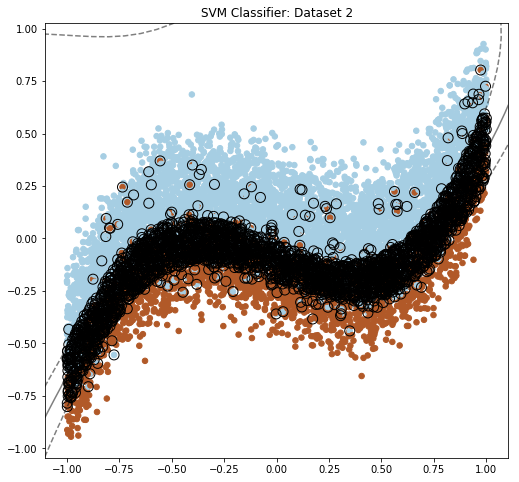

In [18]:
data2_clf = optimize_SVM(X2_train, y2_train, X2_test, y2_test, title='Dataset 2')

### Observation
In dataset 2 is non-linear and SVM grid-search selects a Gaussian RBF kernel. The kernel SVM projects the non-linearly separable data lower dimensions to linearly separable data in higher dimensions in such a way that data points belonging to different classes are allocated to different dimensions. 

The Grid search result suggests that the RBF kernel is performing better in this dataset and a higher `gamma` value can boost the performance. I am going to try a few more parameters of ``gamma`` for the RBF kernel. 

**From the book:** "With the kernel trick, hard-margin SVM can find a hyperplane in the infinite dimensional Z space with model complexity under control if the margin is large enough. The parameter `gamma` controls the the width of the Gaussian RBF kernel"

#### Effect of `Higher Gamma Value` in Gaussian RBF Kernel for Dataset2

Scores for different hyper-parameters
0.865 (+/-0.018) for {'C': 1, 'kernel': 'rbf', 'gamma': 1}
0.866 (+/-0.015) for {'C': 1, 'kernel': 'rbf', 'gamma': 2}
0.866 (+/-0.017) for {'C': 1, 'kernel': 'rbf', 'gamma': 10}
0.867 (+/-0.017) for {'C': 1, 'kernel': 'rbf', 'gamma': 50}
0.866 (+/-0.017) for {'C': 1, 'kernel': 'rbf', 'gamma': 100}
0.865 (+/-0.017) for {'C': 1, 'kernel': 'rbf', 'gamma': 200}
********************************************************************************
Number of Support Vectors/Training samples: 2556/8000
Number of Support Vectors per class: [1304 1252]
Expected E_out : 0.3195399424928116
Best SVM parameters : {'C': 1, 'kernel': 'rbf', 'gamma': 50}
********************************************************************************


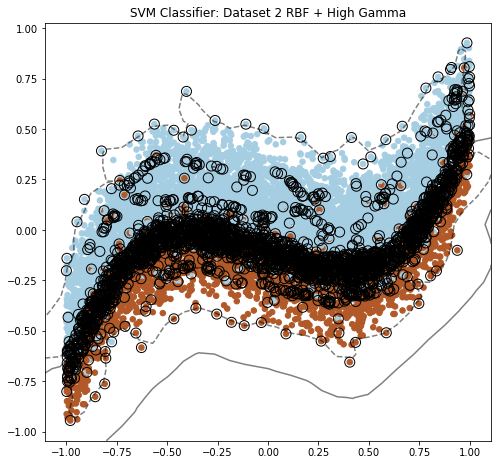

In [19]:
plt.figure(figsize=(8,8))

high_gamma_params = {'C': [1], 'kernel': ['rbf'], 'gamma': [1, 2, 10, 50, 100, 200]}
high_gamma_clf = GridSearchCV(svm.SVC(), high_gamma_params, scoring='accuracy', cv=5, n_jobs=-1)
high_gamma_clf.fit(X2_train, y2_train)

plot_decision_boundary(X2_train, y2_train, high_gamma_clf.best_estimator_, label='Dataset 2 RBF + High Gamma')
print_grid_search_metrics(high_gamma_clf, X2_train)

#### Effect of  `Low Gamma Value` in Gaussian RBF Kernel for Dataset2

Scores for different hyper-parameters
0.667 (+/-0.000) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.0001}
0.667 (+/-0.000) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.001}
0.772 (+/-0.022) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.01}
0.786 (+/-0.025) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.1}
********************************************************************************
Number of Support Vectors/Training samples: 4214/8000
Number of Support Vectors per class: [2108 2106]
Expected E_out : 0.5268158519814977
Best SVM parameters : {'C': 1, 'kernel': 'rbf', 'gamma': 0.1}
********************************************************************************


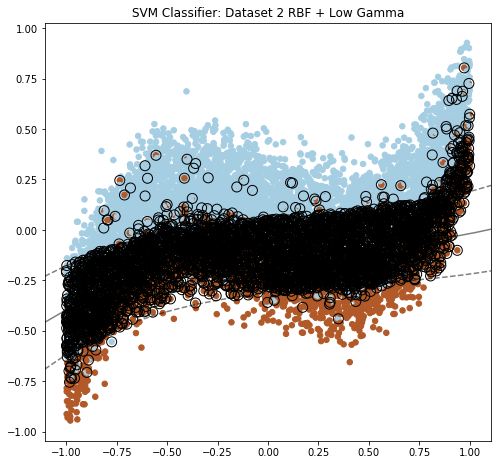

In [20]:
plt.figure(figsize=(8,8))

low_gamma_params = {'C': [1], 'kernel': ['rbf'], 'gamma': [0.0001, 0.001, 0.01, 0.1]}
low_gamma_clf = GridSearchCV(svm.SVC(), low_gamma_params, scoring='accuracy', cv=5, n_jobs=-1)
low_gamma_clf.fit(X2_train, y2_train)

plot_decision_boundary(X2_train, y2_train, low_gamma_clf.best_estimator_, label='Dataset 2 RBF + Low Gamma')
print_grid_search_metrics(low_gamma_clf, X2_train)

### Dataset 2 Conclusion:

**Results:**

| Hyper-parameter | CV score | Number of SV's | Estimated E_out |
|----------------|----------|-------------|-----------------|
|'gamma': 1, 'C': 1, 'kernel': 'rbf' |0.86475|2913|0.3642|
|'gamma': 50, 'C': 1, 'kernel': 'rbf'|0.86475|2556|0.3195|
|'gamma': 0.1, 'C': 1, 'kernel': 'rbf' |0.869|4214|0.5268|

From the plots with varying gamma in Gaussian RBG Kernel, we can see that the higher the gamma value it tries to exactly fit the training data set and can lead to overfitting. On the contrary a low gamma value can lead to under-fitting.

## Dataset 3 hyper-parameter exploration

Scores for different hyper-parameters
0.882 (+/-0.001) for {'C': 0.1, 'kernel': 'linear'}
0.882 (+/-0.001) for {'C': 1, 'kernel': 'linear'}
0.882 (+/-0.001) for {'C': 10, 'kernel': 'linear'}
0.882 (+/-0.001) for {'C': 100, 'kernel': 'linear'}
0.950 (+/-0.010) for {'C': 0.1, 'kernel': 'poly', 'degree': 2}
0.882 (+/-0.001) for {'C': 0.1, 'kernel': 'poly', 'degree': 3}
0.988 (+/-0.010) for {'C': 1, 'kernel': 'poly', 'degree': 2}
0.882 (+/-0.001) for {'C': 1, 'kernel': 'poly', 'degree': 3}
0.988 (+/-0.010) for {'C': 10, 'kernel': 'poly', 'degree': 2}
0.882 (+/-0.001) for {'C': 10, 'kernel': 'poly', 'degree': 3}
0.882 (+/-0.001) for {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.001}
0.882 (+/-0.001) for {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.01}
0.882 (+/-0.001) for {'C': 0.1, 'kernel': 'rbf', 'gamma': 0.1}
0.989 (+/-0.010) for {'C': 0.1, 'kernel': 'rbf', 'gamma': 1}
0.882 (+/-0.001) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.001}
0.882 (+/-0.001) for {'C': 1, 'kernel': 'rbf', 'gamma': 0.01}
0.988 (

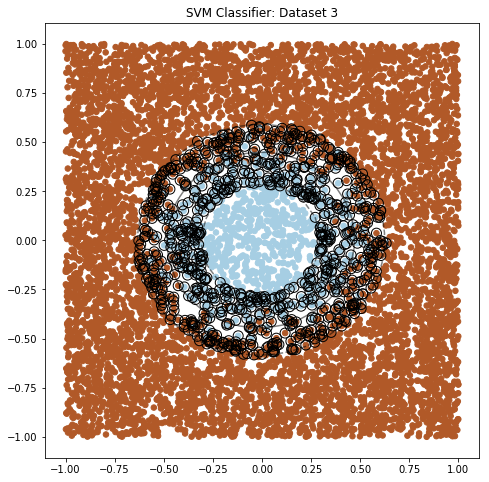

In [21]:
data3_clf = optimize_SVM(X3_train, y3_train, X3_test, y3_test, title='Dataset 3')

### Observation

In dataset 3 is non-linear the the SVM grid search has selected `RBF` kernel as the best classifier. If we zoom into the Grid search results, the `poly` kernel also does a good job too. This makes sense as the data has a circular pattern.

**Score Comparison**
- {'kernel': 'poly', 'C': 1, 'degree': 2}  = 0.988 (+/-0.010)
- {'kernel': 'rbf', 'C': 10, 'gamma': 1}   = 0.989 (+/-0.010)

The trend shows that the parameter gamma and C can be further fine tuned to get better results, Ideally we should be also looking to reduce the number of support vectors as this impacts the E_out.

#### Effect of 2nd order Poly Kernel with a ``High Gamma`` in Dataset-3

Scores for different hyper-parameters
0.988 (+/-0.007) for {'C': 1, 'kernel': 'poly', 'degree': 2, 'gamma': 10}
0.988 (+/-0.007) for {'C': 1, 'kernel': 'poly', 'degree': 2, 'gamma': 100}
0.988 (+/-0.007) for {'C': 1, 'kernel': 'poly', 'degree': 2, 'gamma': 1000}
********************************************************************************
Number of Support Vectors/Training samples: 245/8000
Number of Support Vectors per class: [122 123]
Expected E_out : 0.030628828603575447
Best SVM parameters : {'C': 1, 'kernel': 'poly', 'degree': 2, 'gamma': 10}
********************************************************************************


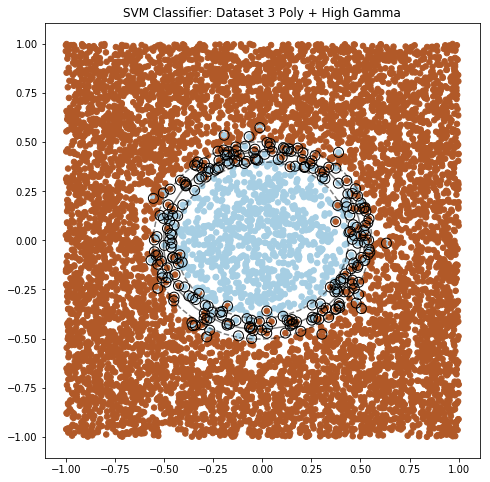

In [22]:
plt.figure(figsize=(8,8))

high_gamma_params = {'C': [1], 'kernel': ['poly'], 'degree': [2], 'gamma': [10, 100, 1000]}
high_gamma_clf = GridSearchCV(svm.SVC(), high_gamma_params, scoring='accuracy', cv=5, n_jobs=-1)
high_gamma_clf.fit(X3_train, y3_train)

plot_decision_boundary(X3_train, y3_train, high_gamma_clf.best_estimator_, label='Dataset 3 Poly + High Gamma')
print_grid_search_metrics(high_gamma_clf, X3_train)

### Dataset 3 Conslusion:

Higher-degree polynomial kernels allows a more flexible decision boundary. 

In dataset3, the 2nd order Polynomial kernel does a good job with low E_out as we have less number of support vectors.

**Results:**

| Hyper-parameter | CV score | Number of SV's | Estimated E_out |
|----------------|----------|-------------|-----------------|
|'kernel': 'poly', 'C': 1, 'gamma': 10, 'degree': 2 | 0.988 (+/-0.007)|245|0.03063|
|'kernel': 'rbf', 'C': 10, 'gamma': 1 | 0.989 (+/-0.010)|911|0.1139|